# **Project Description**

**Problem Statement:** The debt industry is vast, and credit card companies face significant challenges in identifying potential defaulters. Offering credit to individuals who are likely to default can result in substantial financial losses for banks and credit card firms. Accurately assessing whether a current or prospective client will fail to meet their financial obligations is crucial, as it can have a major impact on an institution's balance sheet. To mitigate the risk of default, it is essential to develop and continuously improve predictive solutions.

**Solutuion:** Our goal is to develop a machine learning algorithm that accurately predicts whether a customer will default on their financial obligations, thereby helping financial institutions minimize their risk exposure.



#  **Import Libraries and Dataset**

In [159]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Model imports
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Importing XGBoost
from xgboost import XGBClassifier

# Importing LightGBM
import lightgbm as lgb
data = pd.read_csv("/Users/rahilchadha/Credit-risk-assessment/datasets/credit_risk_dataset.csv")


# **Exploratory Data Analysis**

In [160]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [161]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [162]:
print('Dataframe shape')
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])
shape = data.shape
 
# printing shape
print("Shape = {}".format(shape))


Dataframe shape
Rows: 32581
Columns: 12
Shape = (32581, 12)


In [163]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [164]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Only two of the columns have null values, we will be adressing these null values during the Data Cleaning process.

In [165]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [166]:
#This method counts the number of times each unique value appears in the column 
data.loan_grade.value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [167]:
# Removing categorical values and checking the correlation between columns
dataframe = data.drop(['person_home_ownership', 'loan_intent', 'loan_grade','cb_person_default_on_file'], axis=1)
dataframe.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


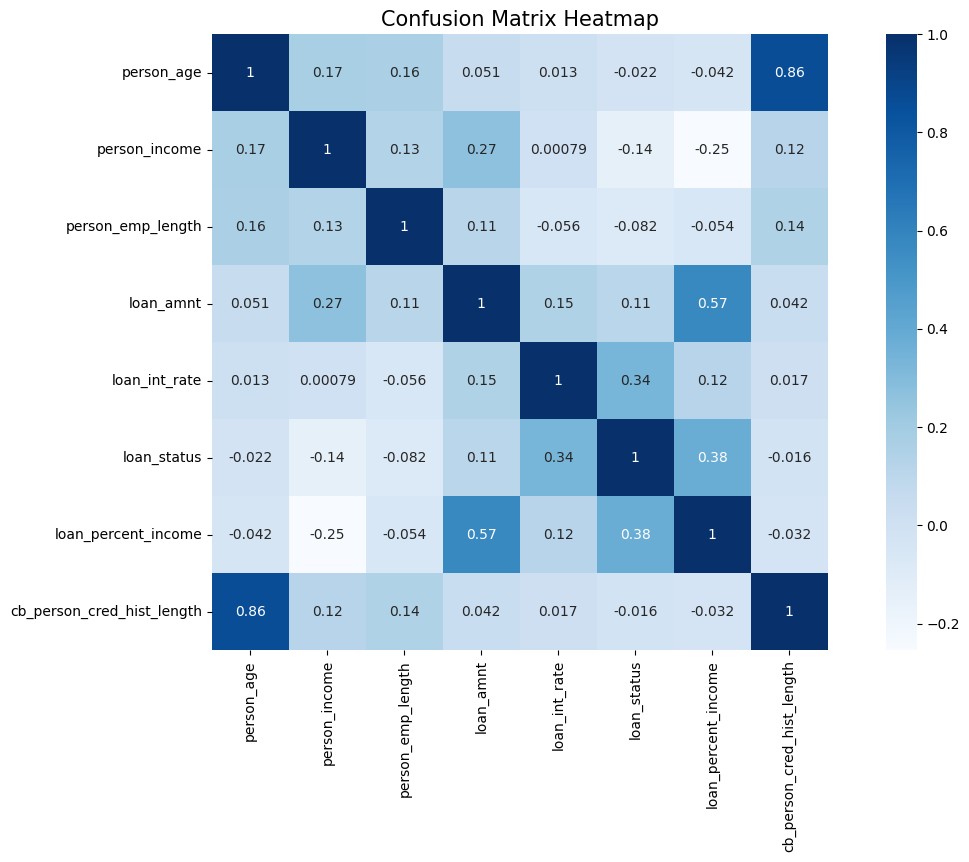

In [168]:

fig, ax = plt.subplots() 
# plt.subplots() is a flexible way to create plots, allowing you to configure subplots and adjust their layout.
fig.set_size_inches(15, 8)
sns.heatmap(dataframe.corr(), vmax=1, square=True, annot=True, cmap='Blues', annot_kws={"size": 10})
plt.title('Confusion Matrix Heatmap', fontsize=15);


Here we can see some interesting correlations, like loan_status and loan_int rate, or loan percent_income and loan_amount are highly proprotinial to each other. 

In [169]:
summary = dataframe['person_age'].describe()

print(summary)

count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


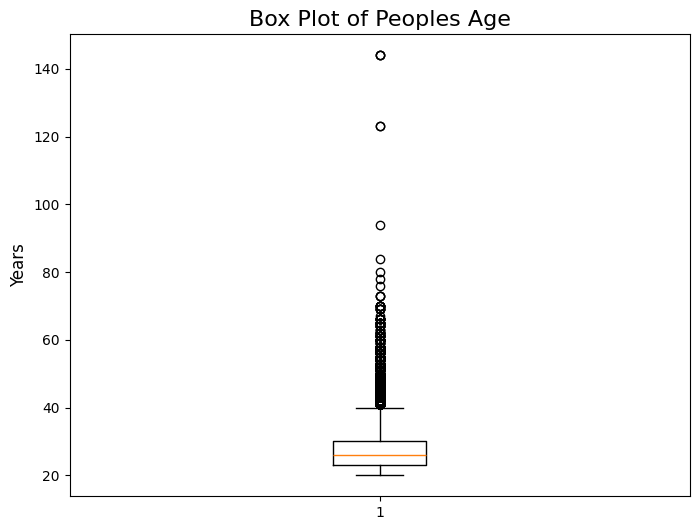

In [170]:
# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data['person_age'])

# Add a title and labels
plt.title('Box Plot of Peoples Age', fontsize=16)
plt.ylabel('Years', fontsize=12)

# Display the plot
plt.show()

The data displayed obviously does not make sense, a persons age is usuallt between years 0 to 100. Therefore during the data trimming process, we will be dealing with these weird outliers that a values of more than 100 years.

In [171]:

# Get value counts for 'loan_grade'
level_counts = data.cb_person_default_on_file.value_counts()

# Create the pie chart
fig = px.pie(
    values=level_counts.values,
    names=level_counts.index,
    color_discrete_sequence=px.colors.sequential.Teal,  # Fixed color sequence
    title='Historical Defaults Distribution'
)

# Update the traces to add text information and styling
fig.update_traces(
    textinfo='label+percent+value',  # Show label, percentage, and value
    textfont_size=13,  # Set font size for text
    marker=dict(
        line=dict(color='gray', width=0)  # Set border color and width
    )
)

# Show the plot
fig.show()

In [172]:
# Get value counts for 'person_home_ownership'
home_ownership_counts = data['person_home_ownership'].value_counts()

# Create the pie chart
fig = px.pie(
    values=home_ownership_counts.values,
    names=home_ownership_counts.index,
    color_discrete_sequence=px.colors.sequential.Teal,  # Fixed color sequence
    title='Distribution of Home Ownership'
)

# Update the traces to add text information and styling
fig.update_traces(
    textinfo='label+percent+value',  # Show label, percentage, and value
    textfont_size=13,  # Set font size for text
    marker=dict(
        line=dict(color='gray')  # Set border color and width
    )
)

# Show the plot
fig.show()



In [173]:
# Get value counts for 'loan_grade'
level_counts = data['loan_grade'].value_counts()

# Create the pie chart with shades of purple
fig = px.pie(
    values=level_counts.values,
    names=level_counts.index,
    color_discrete_sequence=px.colors.sequential.Reds,  # Shades of purple
    title='Distribution of Loan Grades'
)

# Update the traces to add text information and styling
fig.update_traces(
    textinfo='label+percent+value',  # Show label, percentage, and value
    textfont_size=13,  # Set font size for text
    marker=dict(
        line=dict(color='#102000')  # Set border color
    )
)

# Show the plot
fig.show()


In [174]:
# Get value counts for 'loan_status'
level_counts = data['loan_status'].value_counts()

# Define custom colors: one dark purple and one light purple
custom_colors = ['#6A0DAD', '#D8BFD8']  # Dark purple and light purple

# Create the pie chart with the custom colors
fig = px.pie(
    values=level_counts.values,
    names=level_counts.index,
    color_discrete_sequence=custom_colors,  # Custom colors for the two categories
    title='Distribution of Loan Status'
)

# Update the traces to add text information and styling
fig.update_traces(
    textinfo='label+percent+value',  # Show label, percentage, and value
    textfont_size=13,  # Set font size for text
    marker=dict(
        line=dict(color='#102000')  # Set border color
    )
)

# Show the plot
fig.show()


Loan status (0 is non default 1 is default). This will be our target vairable. The loan_status gives us direct information in present time, about a credit card holder and if they defaulted or not.

The distribution of "1" and "0" responses is imbalanced, meaning there are significantly more "0" instances than "1" instances. When the target variable is imbalanced like this, it can negatively impact model performance. The model might become biased towards predicting the majority class ("0") because it sees that outcome more often in the training data. As a result, it could underperform in predicting the minority class ("1"), leading to poor generalization.

To address this issue and improve model accuracy, techniques like class weighting, oversampling the minority class (using methods like SMOTE), or undersampling the majority class can be applied during model training. By treating this imbalance, the model will be better equipped to learn from both "0" and "1" outcomes, resulting in more balanced and accurate predictions.

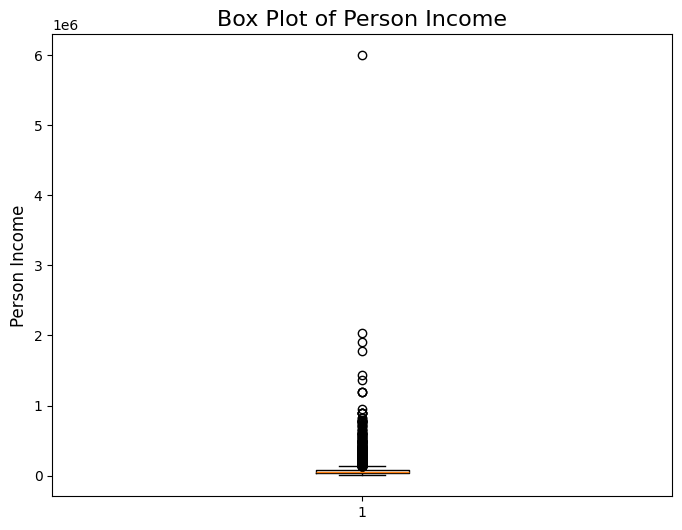

In [175]:
# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data['person_income'])

# Add a title and labels
plt.title('Box Plot of Person Income', fontsize=16)
plt.ylabel('Person Income', fontsize=12)

# Display the plot
plt.show()

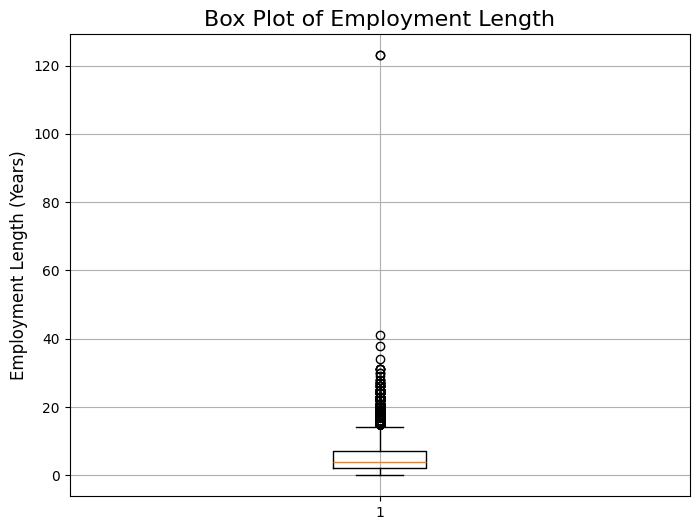

In [176]:
# Create the box plot
plt.figure(figsize=(8, 6))

plt.boxplot(data['person_emp_length'].dropna())  # Drop NaN values for better plotting
plt.title('Box Plot of Employment Length', fontsize=16)
plt.ylabel('Employment Length (Years)', fontsize=12)  # Correct label

# Display the plot
plt.grid(True)  # Add grid for better readability
plt.show()


Again we see weird outliers, outliers beyond the ages 0 and 45 need to be treated. Individuals usually have an employment length of 0 to 45 years. Therefore, we will be treating any data that does not fall in this range.

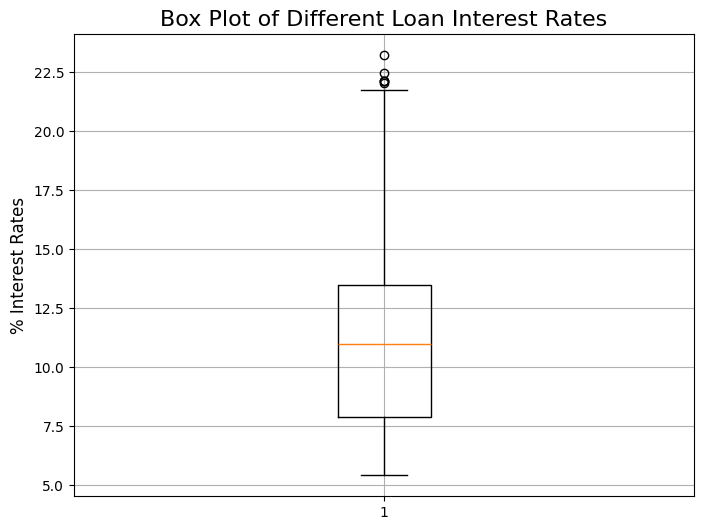

In [177]:

# Create the box plot
plt.figure(figsize=(8, 6))

plt.boxplot(data['loan_int_rate'].dropna())  # Drop NaN values for better plotting
plt.title('Box Plot of Different Loan Interest Rates', fontsize=16)
plt.ylabel('% Interest Rates', fontsize=12)  # Correct label

# Display the plot
plt.grid(True)  # Add grid for better readability
plt.show()

In [178]:
# Create the histogram with the specified settings
fig = px.histogram(
    data, 
    x='loan_intent',
    histnorm='percent',
    text_auto='.2f',
    template='presentation',
    title='Distribution of Loan Intents',
    color_discrete_sequence=px.colors.sequential.Blues_r  # Change to shades of blue
)

# Update layout to ensure the title is horizontal
fig.update_layout(
    title={'text': 'Distribution of Loan Intents', 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
    xaxis_title=None  # Optional: Remove the default x-axis title if not needed
)

# Show the plot
fig.show()


This data is equally distributed. Which makes this a good column to train our data on, since they are equal amounts of data for each loan intent.

#                             Description of variables
             
**person_age**: Age of the individual applying for the loan.

**person_income**: Annual income of the individual.

**person_home_ownership**: Type of home ownership of the individual.
*     rent: The individual is currently renting a property.
*     mortgage: The individual has a mortgage on the property they own.
*     own: The individual owns their home outright.
*     other: Other categories of home ownership that may be specific to the dataset.


**person_emp_length**: Employment length of the individual in years.

**loan_intent:** The intent behind the loan application.

**loan_grade:** The grade assigned to the loan based on the creditworthiness of the borrower.

*          A: The borrower has a high creditworthiness, indicating low risk.
*          B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
*          C: The borrower's creditworthiness is moderate.
*          D: The borrower is considered to have higher risk compared to previous grades.
*          E: The borrower's creditworthiness is lower, indicating a higher risk.
*          F: The borrower poses a significant credit risk.
*          G: The borrower's creditworthiness is the lowest, signifying the highest risk.


**loan_amnt:** The loan amount requested by the individual.

**loan_int_rate:** The interest rate associated with the loan.

**loan_status:** Loan status, where 0 indicates non-default and 1 indicates default.
*        0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
*        1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.

**loan_percent_income:** The percentage of income represented by the loan amount.

**cb_person_default_on_file:** Historical default of the individual as per credit bureau records.

*        Y: The individual has a history of defaults on their credit file.
*        N: The individual does not have any history of defaults.

**cb_preson_cred_hist_length:** The length of credit history for the individual.


#   **Data Cleaning and Process** 

**Steps to clean & process data**

1. Deal with outliers and data that doesnt make sense
2. We will deal with null values
3. Check for dupliactes and then treat them
4. We will then encode categorical values so they can be used in our Model
5. Standardizing all data for out Model

# **Dealing with Categorical Values**

Label encoding

In [179]:
le = LabelEncoder()

# Fit and transform the column
data['person_home_ownership_encoded'] = le.fit_transform(data['person_home_ownership'])

# Display the category-to-label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Category-to-Label Mapping:")
print(label_mapping)



Category-to-Label Mapping:
{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}


In [180]:
le = LabelEncoder()

# Fit and transform the column
data['cb_person_default_on_file_encoded'] = le.fit_transform(data['cb_person_default_on_file'])

# Display the category-to-label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Category-to-Label Mapping:")
print(label_mapping)



Category-to-Label Mapping:
{'N': 0, 'Y': 1}


In [181]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'loan_grade' column
data['loan_grade_encoded'] = le.fit_transform(data['loan_grade'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Category-to-Label Mapping:")
print(label_mapping)


Category-to-Label Mapping:
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}


In [182]:
le = LabelEncoder()

# Fit and transform the column
data['loan_intent_encoded'] = le.fit_transform(data['loan_intent'])
# Display the category-to-label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Category-to-Label Mapping:")
print(label_mapping)


Category-to-Label Mapping:
{'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}


In [183]:
cleaned_data = data.drop(['person_home_ownership', 'cb_person_default_on_file', 'loan_grade', 'loan_intent'], axis=1)
cleaned_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_encoded,cb_person_default_on_file_encoded,loan_grade_encoded,loan_intent_encoded
0,22,59000,123.0,35000,16.02,1,0.59,3,3,1,3,4
1,21,9600,5.0,1000,11.14,0,0.10,2,2,0,1,1
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,2,3
3,23,65500,4.0,35000,15.23,1,0.53,2,3,0,2,3
4,24,54400,8.0,35000,14.27,1,0.55,4,3,1,2,3


# **Dealing with null values**


In [184]:
# Only two column have null values those are loan_interesr rate
print((data.isnull().sum() / data.shape[0]).sort_values(ascending=False))

loan_int_rate                        0.095639
person_emp_length                    0.027470
person_age                           0.000000
person_income                        0.000000
person_home_ownership                0.000000
loan_intent                          0.000000
loan_grade                           0.000000
loan_amnt                            0.000000
loan_status                          0.000000
loan_percent_income                  0.000000
cb_person_default_on_file            0.000000
cb_person_cred_hist_length           0.000000
person_home_ownership_encoded        0.000000
cb_person_default_on_file_encoded    0.000000
loan_grade_encoded                   0.000000
loan_intent_encoded                  0.000000
dtype: float64


We will handle the missing values in the dataset using different strategies based on the nature of the columns. For the "person_emp_length" column, which represents the length of employment in years, we’ll replace the missing values with the mean. This approach is reasonable because employment length is typically stable and using the mean provides a good estimate without significantly impacting the data distribution.

In [185]:
# Calculate the mean, rounding to the nearest integer
mean_value = cleaned_data['person_emp_length'].mean()
rounded_mean = round(mean_value)

# Replace NaN values with the rounded mean
cleaned_data['person_emp_length'] = cleaned_data['person_emp_length'].fillna(rounded_mean)

# Verify the result
print("Replaced NaNs with mean value:", rounded_mean)
print(cleaned_data['person_emp_length'].head())


Replaced NaNs with mean value: 5
0    123.0
1      5.0
2      1.0
3      4.0
4      8.0
Name: person_emp_length, dtype: float64


On the other hand, replacing nan values in "loan_int_rate" with global mean or global median of the column does not make sense, since each idnvidial account deatails can have different loan interest rates.

However, The interest rate "loan_int_rate" is likely determined by a combination of factors like the loan amount, the percentage of income the loan represents, and the loan status (whether it's defaulted or not). Imputing based on these correlated factors ensures that you maintain the underlying relationships in the data.

By grouping the data by correlated columns, the imputed values for missing interest rates, our machine learning model can be more accurate. 
**Group-based Median Imputation**: By grouping the data by the imputed values will align with how interest rates are typically determined in real life—based loans

Earlier in the confusion matrix I found, "loan_int_rate" has has a somewhat high correlation with these 3 columns "loan_amnt","loan_percent_income" and "loan_status"


In [186]:
cleaned_data['loan_int_rate'] = cleaned_data.groupby(['loan_grade_encoded', 'loan_intent_encoded'])['loan_int_rate'].transform(lambda x: x.fillna(x.median()))

remaining_nans = cleaned_data['loan_int_rate'].isna().sum()

#check the skweness of the data

print("Number of NaNs after replacement:", remaining_nans)



Number of NaNs after replacement: 0


# **Removing erroneous inputs/weird outliers**

In [187]:
# Calculate the mean for the person_emp_length column
mean_emp_length = round(cleaned_data['person_emp_length'].mean())

# Trim outliers: Replace values outside the range 0 to 45 with the mean
cleaned_data['person_emp_length'] = cleaned_data['person_emp_length'].apply(lambda x: mean_emp_length if x < 0 or x > 45 else x)

In [188]:
# Calculate the mean for the person_age column
mean_emp_length = round(cleaned_data['person_age'].mean())

# Trim outliers: Replace values outside the range 0 to 100 with the mean
cleaned_data['person_age'] = cleaned_data['person_age'].apply(lambda x: mean_emp_length if x < 0 or x > 100 else x)

# **Dealing with Duplicate Rows**

In [189]:
duplicates = cleaned_data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

print(f"Number of duplicate rows dropped: {num_duplicates}")

# drop duplicates rows
df_no_duplicates = cleaned_data.drop_duplicates()

Number of duplicate rows dropped: 165


# Making a copy of the cleaned unscaled data, 

In [190]:
cleaned_data.to_csv('cleaned_unscaled_data.csv', index=False)


# **Standardizing Data**

We now need to standardize our data. Standardization ensures that each feature contributes equally to the model by bringing them to the same scale. Standardizing helps in the machine learning models to train efficiently, converge faster, and make more accurate predictions.

In [191]:
# List of columns to ignore (categorical columns)
ignore_columns = ['person_home_ownership_encoded', 'cb_person_default_on_file_encoded', 'loan_grade_encoded', 'loan_intent_encoded','loan_status']

# Select the numeric columns that are not in the ignore list
numeric_columns = [col for col in cleaned_data.columns if col not in ignore_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler only to the numeric columns
cleaned_data[numeric_columns] = scaler.fit_transform(cleaned_data[numeric_columns])

cleaned_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_encoded,cb_person_default_on_file_encoded,loan_grade_encoded,loan_intent_encoded
0,-0.921615,-0.114143,0.053224,4.019404,1.558376,1,3.931411,-0.691554,3,1,3,4
1,-1.082791,-0.911147,0.053224,-1.358650,0.039232,0,-0.657458,-0.938167,2,0,1,1
2,-0.438089,-0.911147,-0.952040,-0.646849,0.577781,1,3.744110,-0.691554,0,0,2,3
3,-0.760440,-0.009274,-0.198092,4.019404,1.312449,1,3.369508,-0.938167,3,0,2,3
4,-0.599264,-0.188358,0.807172,4.019404,1.013601,1,3.556809,-0.444942,3,1,2,3


### Making a copy of the Dataframe

In [192]:
# Save cleaned_data to a CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)

In [193]:
cleaned_data = pd.read_csv('cleaned_data.csv')

# **Splitting the Data**

Target variable = "loan_status" 
We noticed our tagert variable "loan_status" is imbalanced with 1 (default) being a minority and 0 being majority. This can make our model biased and innacurate. Therefore to make sure out balance our data we will be using an over-sampling technique called "SMOTE - Synthetic Minority Oversampling Technique".

In [194]:
x = cleaned_data.drop(columns=['loan_status'])
y = cleaned_data['loan_status']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Balancing Data
We noticed our tagert variable "loan_status" is imbalanced with 1 (default) being a minority and 0 (no-default) being majority. This can make our model biased and innacurate. Therefore to make sure out balance our data we will be using an over-sampling technique called "SMOTE - Synthetic Minority Oversampling Technique".

In [195]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training data
sm = SMOTE(random_state=12, sampling_strategy=1)
x_train, y_train = sm.fit_resample(x_train, y_train)

# Check the distribution after SMOTE
print("Original y_train distribution:")
print(y_train.value_counts())
print("\nResampled y_train distribution:")
print(y_train.value_counts())


Original y_train distribution:
1    19081
0    19081
Name: loan_status, dtype: int64

Resampled y_train distribution:
1    19081
0    19081
Name: loan_status, dtype: int64


In [196]:
# List of models
models = {

    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    # Logistic Regression (L2)
    'Logistic Regression (L2)': LogisticRegression(
        penalty='l2',
        max_iter=1000
    ),
    # Logistic Regression (L1)
    'Logistic Regression (L1)': LogisticRegression(
        penalty='l1',
        solver='liblinear',
        max_iter=1000
    ),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    'LightGBM': lgb.LGBMClassifier(
        force_row_wise=True,
        verbosity=-1
    )
}

# Train and evaluate each model
model_results = {}

for name, model in models.items():

    print(f"Training and evaluating {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    model_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1 Score': f1
    }


ranked_models = sorted(
    model_results.items(),
    key=lambda x: x[1]['Recall'],
    reverse=True
)

print("\nModel Ranking Based on Recall:\n")


for i, (name, metrics) in enumerate(ranked_models, 1):

    print(f"{i}. {name}")
    print(f"   Recall: {metrics['Recall']:.4f}")
    print(f"   Precision: {metrics['Precision']:.4f}")
    print(f"   Accuracy: {metrics['Accuracy']:.4f}")
    print(f"   F1 Score: {metrics['F1 Score']:.4f}")
    print("-" * 40)



Training and evaluating K-Nearest Neighbors...
Training and evaluating Support Vector Machine...
Training and evaluating Decision Tree...
Training and evaluating Logistic Regression (L2)...
Training and evaluating Logistic Regression (L1)...
Training and evaluating Naive Bayes...
Training and evaluating Random Forest...
Training and evaluating Extra Trees...
Training and evaluating Gradient Boosting...
Training and evaluating XGBoost...
Training and evaluating LightGBM...

Model Ranking Based on Recall:

1. Naive Bayes
   Recall: 0.7902
   Precision: 0.4568
   Accuracy: 0.7525
   F1 Score: 0.5789
----------------------------------------
2. Logistic Regression (L2)
   Recall: 0.7697
   Precision: 0.5030
   Accuracy: 0.7866
   F1 Score: 0.6084
----------------------------------------
3. Logistic Regression (L1)
   Recall: 0.7697
   Precision: 0.5024
   Accuracy: 0.7863
   F1 Score: 0.6080
----------------------------------------
4. Support Vector Machine
   Recall: 0.7594
   Precision: 0

## Adding a new variable F Beta

The F-beta score is a weighted version of the F1 score that allows you to control the importance of recall relative to precision. When β > 1, recall is given more importance, and when β < 1, precision is prioritized. It combines both metrics into a single score based on business needs. In credit risk, using a higher β helps focus more on detecting defaulters. Since default detection is more critical than false alarms, we used a recall-weighted evaluation metric. We applied an F-beta score with β=1.5 to prioritize recall while maintaining acceptable precision.

In [197]:
from sklearn.metrics import fbeta_score

beta = 1.5

for name, metrics in model_results.items():

    P = metrics['Precision']
    R = metrics['Recall']

    f_beta = (1 + beta**2) * (P * R) / ((beta**2 * P) + R)

    model_results[name]['F-Beta'] = f_beta



# **ML model metrics**

In [198]:
results_df = pd.DataFrame(model_results).T

results_df = results_df.sort_values(by='Accuracy', ascending=False)

def highlight_high_accuracy(s):
    is_high_accuracy = s['Accuracy'] > 0.90
    return ['background-color: yellow; color: black' if is_high_accuracy else '' for _ in s]

# Create a Styler object
styled_df = results_df.style \
    .set_table_styles({
        'Accuracy': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'Precision': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'Recall': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'Specificity': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'F1 Score': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'F-Beta': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'Model': [{'selector': 'td', 'props': [('border', '1px solid black')]}]
    }) \
    .set_caption('Model Performance Metrics')

#   .apply(highlight_high_accuracy, axis=1) \  
    

# Display the styled DataFrame
styled_df

,Accuracy,Precision,Recall,Specificity,F1 Score,F-Beta
LightGBM,0.932850,0.966023,0.713227,0.993116,0.820597,0.775684
XGBoost,0.931255,0.948198,0.720068,0.989205,0.818535,0.777636
Random Forest,0.924748,0.913706,0.718358,0.981383,0.804341,0.768942
Extra Trees,0.914928,0.868659,0.712657,0.970432,0.782963,0.754340
Gradient Boosting,0.900810,0.790898,0.733181,0.946809,0.760947,0.750022
Decision Tree,0.862632,0.656635,0.758837,0.891114,0.704047,0.724157
Support Vector Machine,0.857967,0.644412,0.759407,0.885013,0.697200,0.719880
K-Nearest Neighbors,0.810459,0.544007,0.740023,0.829787,0.627053,0.666167
Logistic Regression (L2),0.786644,0.502981,0.769669,0.791302,0.608382,0.661715
Logistic Regression (L1),0.786275,0.502419,0.769669,0.790832,0.607971,0.661416


In the context of loan default prediction, two key factors come into play: the potential financial impact of missed loan defaults and the risk of denying loans to trustworthy applicants.

1- Recall (Sensitivity): Recall measures how well the model identifies actual loan defaults. For lenders, missing a loan that eventually defaults can lead to significant financial losses. Thus, achieving a high Recall is essential because it ensures that most potential default cases are detected, minimizing the risk of financial setbacks.

2- Specificity: Specificity gauges the model's accuracy in identifying loans that won't default (evaluates the accuracy of negative predictions). Misclassifying a reliable borrower as a potential defaulter (false positive) can result in lost business opportunities. By emphasizing high Specificity, the model aims to avoid misclassifications that could deny loans to credible applicants.

3- Precision: Precision is a key metric as it evaluates the accuracy of positive predictions. Lenders need to avoid false positives (incorrectly predicting defaults) to prevent unwarranted actions. Maintaining high Precision ensures that when the model predicts a default, it's highly likely to be accurate. This protects the lender from unnecessary costs and safeguards borrower relationships.

In [199]:
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(conf_df)

# Extract and display False Positives specifically
false_positives = conf_df.loc['Actual Negative', 'Predicted Positive']
print(f"\nNumber of False Positives: {false_positives}")

false_negatives = conf_df.loc['Actual Positive', 'Predicted Negative']
print(f"Number of False Negatives: {false_negatives}")

cross_tab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\nCross-tab of Actual vs. Predicted Values:")
print(cross_tab)


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                6348                  44
Actual Positive                 503                1251

Number of False Positives: 44
Number of False Negatives: 503

Cross-tab of Actual vs. Predicted Values:
Predicted     0     1   All
Actual                     
0          6348    44  6392
1           503  1251  1754
All        6851  1295  8146


False positive is worse, if an individual does not pay the credit card it might hurt the credit card insitution and incur them losses. Therfore recall, precesion and specificity in order of importance ranking. 

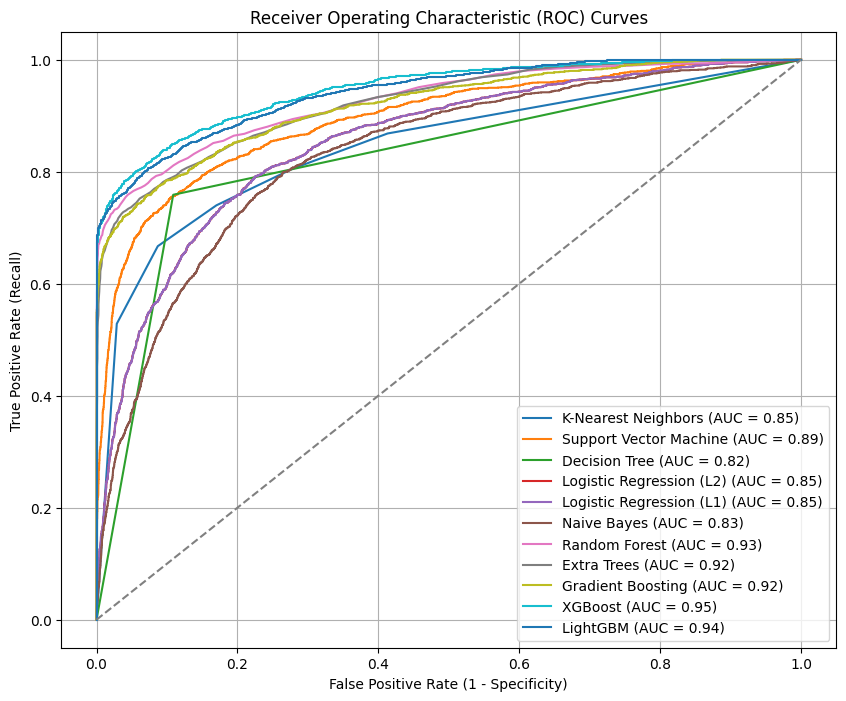

In [200]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Dictionary to store ROC curve data for each model
roc_data = {}

for name, model in models.items():
    y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    roc_data[name] = (fpr, tpr, auc_score)

plt.figure(figsize=(10, 8))

for name, (fpr, tpr, auc_score) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels, title, legend, and grid
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

auc_df = pd.DataFrame({
    'Model': list(roc_data.keys()),
    'AUC Score': [auc_score for _, _, auc_score in roc_data.values()]
})

In [201]:
results_df = pd.DataFrame(model_results).T
results_df['Model'] = results_df.index

beta = 1.5
results_df['F-Beta'] = (
    (1 + beta**2) * (results_df['Precision'] * results_df['Recall']) /
    ((beta**2 * results_df['Precision']) + results_df['Recall'])
)
results_df = pd.merge(results_df, auc_df, on='Model')
results_df = results_df[
    ['Model','Accuracy','Precision','Recall','Specificity','F1 Score','F-Beta','AUC Score']
]

results_df = results_df.sort_values(by='F-Beta', ascending=False)
def highlight_max(s):
    return ['background-color: yellow; color: black' if v else '' for v in (s == s.max())]
results_df = results_df.reset_index(drop=True)

styled_df = results_df.style \
.apply(
    highlight_max,
    subset=['Accuracy','Precision','Recall','Specificity','F1 Score','F-Beta','AUC Score']
) \
.set_table_styles({
    'Model':[{'selector':'td','props':[('border','1px solid black')]}],
    'Accuracy':[{'selector':'td','props':[('border','1px solid black')]}],
    'Precision':[{'selector':'td','props':[('border','1px solid black')]}],
    'Recall':[{'selector':'td','props':[('border','1px solid black')]}],
    'Specificity':[{'selector':'td','props':[('border','1px solid black')]}],
    'F1 Score':[{'selector':'td','props':[('border','1px solid black')]}],
    'F-Beta':[{'selector':'td','props':[('border','1px solid black')]}],
    'AUC Score':[{'selector':'td','props':[('border','1px solid black')]}]
}) \
.set_caption('Model Performance Metrics Scores')

# Display
styled_df


,Model,Accuracy,Precision,Recall,Specificity,F1 Score,F-Beta,AUC Score
0,XGBoost,0.931255,0.948198,0.720068,0.989205,0.818535,0.777636,0.946261
1,LightGBM,0.932850,0.966023,0.713227,0.993116,0.820597,0.775684,0.941149
2,Random Forest,0.924748,0.913706,0.718358,0.981383,0.804341,0.768942,0.927061
3,Extra Trees,0.914928,0.868659,0.712657,0.970432,0.782963,0.754340,0.922333
4,Gradient Boosting,0.900810,0.790898,0.733181,0.946809,0.760947,0.750022,0.918935
5,Decision Tree,0.862632,0.656635,0.758837,0.891114,0.704047,0.724157,0.824975
6,Support Vector Machine,0.857967,0.644412,0.759407,0.885013,0.697200,0.719880,0.894289
7,K-Nearest Neighbors,0.810459,0.544007,0.740023,0.829787,0.627053,0.666167,0.845517
8,Logistic Regression (L2),0.786644,0.502981,0.769669,0.791302,0.608382,0.661715,0.853500
9,Logistic Regression (L1),0.786275,0.502419,0.769669,0.790832,0.607971,0.661416,0.853487


# **Hyperparameter Tuning**

In [202]:
x = cleaned_data.drop(columns=['loan_status'])
y = cleaned_data['loan_status']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Best parameters: {'smote__sampling_strategy': 0.5555555555555556}


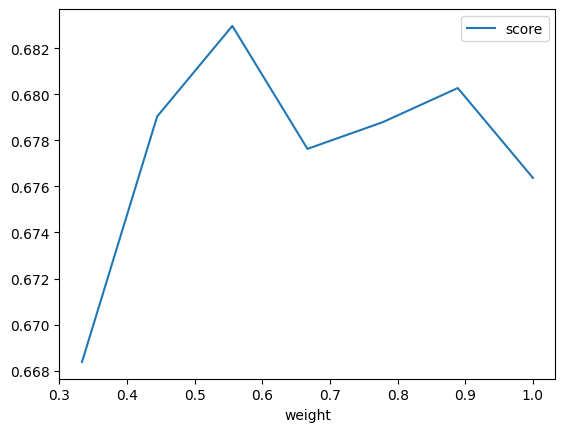

In [203]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import make_scorer, fbeta_score


# Suppress all warnings
warnings.filterwarnings("ignore")

# Define your pipeline with SMOTE and KNeighborsClassifier
pipe = Pipeline([
    ('smote', SMOTE()),
    ('knn', KNeighborsClassifier())
])

# Generate weight ratios in the range 0.1 to 0.5
weights = np.linspace(0,1, 10)


fbeta_scorer = make_scorer(fbeta_score, beta=1.5)

# Set up GridSearchCV
gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights
    },
    scoring=fbeta_scorer,
    cv=3
)

# Fit the model to your training data
grid_result = gsc.fit(x_train, y_train)

# Display the best parameters
print("Best parameters: %s" % grid_result.best_params_)

# Convert results to a DataFrame for easier visualization
weight_f1_score_df = pd.DataFrame({
    'score': grid_result.cv_results_['mean_test_score'],
    'weight': weights
})

# Plot the scores to visualize performance across weight ratios
weight_f1_score_df.plot(x='weight')

best_smote_weight = grid_result.best_params_['smote__sampling_strategy']


We ran a similar code for improving accuracy and got the same result

This code uses Bayesian Optimization (BayesSearchCV) to automatically tune XGBoost’s hyperparameters in order to maximize recall. It tests different combinations of parameters like learning rate, tree depth, and number of estimators using cross-validation. Instead of trying all possibilities, it intelligently searches the most promising configurations. The model is trained multiple times and evaluated based on recall performance. Finally, it selects and prints the best parameter set that gives the highest recall score.

In [204]:
import numpy as np
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split

param_space = {
 'learning_rate': (0.01, 1.0, 'log-uniform'),
 'max_depth': (1, 50),
 'gamma': (1e-9, 0.6, 'log-uniform'),
 'n_estimators': (50, 100),
 'degree': (1, 6),  
 'kernel': ['linear', 'rbf', 'poly']
}

optimizer = BayesSearchCV(
 estimator=XGBClassifier(n_jobs=1),
 search_spaces=param_space,
 scoring=fbeta_scorer,
 cv=3,
 n_iter=50,
)

#Fit the model
optimizer.fit(x_train, y_train)

# After fitting, you can get the best parameters and score as follows:
best_params = optimizer.best_params_
best_score = optimizer.best_score_
print(f"Best parameters: {best_params}")
print(f"Best fbeta score: {best_score}")

Best parameters: OrderedDict([('degree', 6), ('gamma', 0.0003681467055647472), ('kernel', 'linear'), ('learning_rate', 0.2635608044553807), ('max_depth', 14), ('n_estimators', 81)])
Best fbeta score: 0.7935178224618911


This Baysian Optimisation is used to imporve recall by 2 percent%

# **Tuned Model**

In [205]:
cleaned_data = pd.read_csv('datasets/cleaned_data.csv')

In [206]:
x = cleaned_data.drop(columns=['loan_status'])
y = cleaned_data['loan_status']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [207]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training data
sm = SMOTE(random_state=12, sampling_strategy=best_smote_weight)
x_train, y_train = sm.fit_resample(x_train, y_train)

# Check the distribution after SMOTE
print("Original y_train distribution:")
print(y_train.value_counts())
print("\nResampled y_train distribution:")
print(y_train.value_counts())

Original y_train distribution:
0    19116
1    10620
Name: loan_status, dtype: int64

Resampled y_train distribution:
0    19116
1    10620
Name: loan_status, dtype: int64


In [208]:
# List of models
# models = {
    # 'K-Nearest Neighbors': KNeighborsClassifier(),
    # 'Support Vector Machine': SVC(probability=True),
    # 'Decision Tree': DecisionTreeClassifier(),
    # 'Logistic Regression': LogisticRegression(),
    # 'Random Forest': RandomForestClassifier(),
    # 'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),  # Use SAMME instead of SAMME.R
    # 'Bagging Classifier': BaggingClassifier(),
    # 'Extra Trees': ExtraTreesClassifier(),
    # 'Gradient Boosting': GradientBoostingClassifier(),
#     XGBClassifier(
#     learning_rate=best_params['learning_rate'],
#     max_depth=best_params['max_depth'],
#     gamma=best_params['gamma'],
#     n_estimators=best_params['n_estimators']
# )
    # 'LightGBM': lgb.LGBMClassifier(force_row_wise=True, verbosity=-1)
# }
models = {
    'XGBoost': XGBClassifier(
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        gamma=best_params['gamma'],
        n_estimators=best_params['n_estimators']
    )
    # Add other models here if needed
}

# Train and evaluate each model
model_results = {}
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

# Train and evaluate each model
# model_results = {}
# for name, model in models.items():
#     print(f"Training and evaluating {name}...")
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
    #y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    beta = 1.5
    fbeta = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

    
    model_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1 Score': f1,
        'F-beta': fbeta
    }
    
    # # Print the results
    # print(f"Results for {name}:")
    # print(f"Accuracy: {accuracy:.4f}")
    # print(f"Precision: {precision:.4f}")
    # print(f"Recall: {recall:.4f}")
    # print(f"Specificity: {specificity:.4f}")
    # print(f"F1 Score: {f1:.4f}")
    # print("-" * 30)

# Convert the model_results dictionary into a DataFrame
results_df = pd.DataFrame(model_results).T

# Sort the DataFrame by 'Accuracy' in descending order
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display the DataFrame in a table format
#print(results_df)

# Function to highlight rows where accuracy is greater than 0.90
def highlight_high_accuracy(s):
    is_high_accuracy = s['Accuracy'] > 0.90
    return ['background-color: yellow; color: black' if is_high_accuracy else '' for _ in s]

# Create a Styler object
styled_df = results_df.style \
    .set_table_styles({
        'Accuracy': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'Precision': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'Recall': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'Specificity': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'F1 Score': [{'selector': 'td', 'props': [('border', '1px solid black')]}],
        'F-Beta':[{'selector':'td','props':[('border','1px solid black')]}],
        'Model': [{'selector': 'td', 'props': [('border', '1px solid black')]}],

    }) \
    .set_caption('Model Performance Metrics')

#   .apply(highlight_high_accuracy, axis=1) \  
    

# Display the styled DataFrame
styled_df

Training and evaluating XGBoost...


,Accuracy,F-beta,F1 Score,Precision,Recall,Specificity
XGBoost,0.932237,0.797626,0.829630,0.926258,0.751258,0.983168


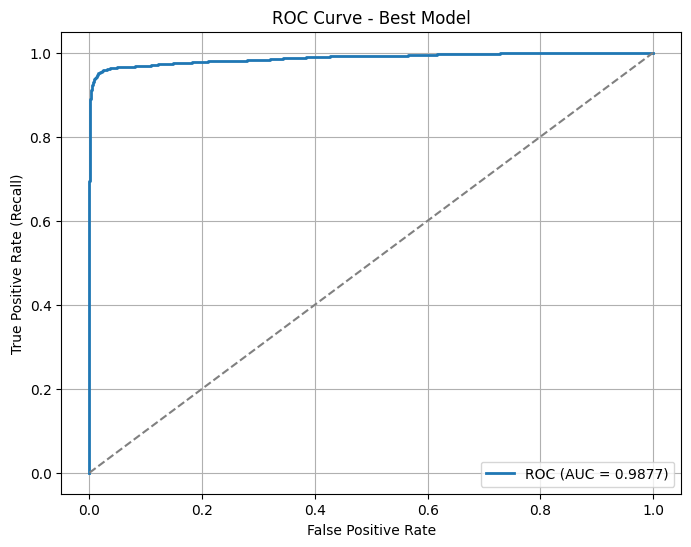

AUC: 0.9877
TPR at optimal threshold: 0.9508
FPR at optimal threshold: 0.0156
Confusion matrix at optimal threshold: TN=6258, FP=99, FN=88, TP=1701


In [209]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import numpy as np

# ROC curve and AUC for the best model
import matplotlib.pyplot as plt

# Determine best model (prefer variable 'best_model' if available)
try:
    model_to_eval = best_model
except NameError:
    # fallback: pick top model from results_df or last trained model in models
    try:
        model_to_eval = models[results_df.index[0]]
    except Exception:
        # last resort: take any model from models dict
        model_to_eval = list(models.values())[-1]

# Get scores (probabilities or decision function)
if hasattr(model_to_eval, "predict_proba"):
    y_score = model_to_eval.predict_proba(x_test)[:, 1]
else:
    y_score = model_to_eval.decision_function(x_test)

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_score = roc_auc_score(y_test, y_score)

# Identify optimal threshold (Youden's J statistic)
youden_index = tpr - fpr
opt_idx = np.argmax(youden_index)
opt_threshold = thresholds[opt_idx]
opt_tpr, opt_fpr = tpr[opt_idx], fpr[opt_idx]

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.4f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#plt.scatter(opt_fpr, opt_tpr, color='red', zorder=5, label=f'Optimal thresh = {opt_threshold:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Best Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print metrics at optimal threshold and confusion matrix
y_pred_opt = (y_score >= opt_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

print(f"AUC: {auc_score:.4f}")
#rint(f"Optimal threshold (Youden's J): {opt_threshold:.4f}")
print(f"TPR at optimal threshold: {opt_tpr:.4f}")
print(f"FPR at optimal threshold: {opt_fpr:.4f}")
print(f"Confusion matrix at optimal threshold: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

A pickle file is used to save trained Python objects, such as machine learning models, in a binary format. It allows you to store a trained model on disk and reload it later without retraining. This helps in deploying models and reusing them efficiently. Pickle preserves the exact state of the object.

In [210]:
import pickle
results_df = pd.DataFrame(model_results).T
if 'F-beta' in results_df.columns:
    results_df = results_df.drop(columns=['F-beta'])


beta = 1.5

results_df['F-Beta'] = (
    (1 + beta**2) *
    (results_df['Precision'] * results_df['Recall']) /
    ((beta**2 * results_df['Precision']) + results_df['Recall'])
)

results_df = results_df.sort_values(by='F-Beta', ascending=False)

best_model_name = results_df.index[0]
best_model = models[best_model_name]

with open("datasets/best_credit_score_model.pickle", "wb") as f:
    pickle.dump(best_model, f)

# Print results
print(f"The Best model based on F-Beta is: {best_model_name}")
print(results_df)


The Best model based on F-Beta is: XGBoost
         Accuracy  F1 Score  Precision    Recall  Specificity    F-Beta
XGBoost  0.932237   0.82963   0.926258  0.751258     0.983168  0.797626
